In [1]:
import time
from typing import Iterator

import matplotlib.pyplot as plt

from src import loader

# Diseño Productor-Consumidor

El primer diseño de este experimento, consiste en la implementación de un flujo con encolamiento, haciendo uso de la clase `asyncio.Queue`. 
Inicialmente se diseñó una función asíncrona, que se encarga de la descarga de imagenes, y subirlas hacia la cola en donde serán almacenadas para que el consumidor las lea.
La cantidad de imagenes que serán subidas en la cola depende del parámetro `maxsize` definido al instanciar la clase `Queue`.
Con esto se busca encontrar un balance entre velocidad y memoria usada para la carga y descarga de las imagenes. Se busca lograr con este patrón las siguientes características:

* Limita la cantidad de imagenes descargadas: Con el uso del encolamiento, se busca que el productor, en este caso el servicio de descarga de imagenes no sature el disco descargandolas todas desde el inicio, sino que solo vaya descargando las suficientes para mantener la cola llena, y cuando el consumidor vaya liberando un espacio de la cola, mientras procesa la imagen, el productor vaya descargando la otra imagen para manetener la cola llena, de tal manera que no se generen pérdidas de tiempo por I/O Bound

* Dejar una cantidad fija de imagenes listas para el consumidor: Con esto se busca que el consumidor no tenga que ir hasta el disco y leer la imagen, sino que se encuentre lista por el productor dentro del sistema de encolamiento.

Las pruebas de carga de este método se hicieron con el siguiente comando:
`/usr/bin/python ./asyncloader_queue.py --inputs ./data/pokemon-gen1-data.csv --output_dir .downloads/`


Los resultados son los siguientes:

In [2]:
!/usr/bin/python /home/carlos/Eafit/computer-vision-data-loader/src/asyncloader_queue.py --inputs ./data/pokemon-gen1-data.csv --output_dir .downloads/

Elapsed is 0.0000
<generator object read_pokemons at 0x7f498081a880>
Donwloading machoke
Donwloading arcanine
Donwloading doduo
Donwloading kadabra
Donwloading farfetch'd
Donwloading jigglypuff
Donwloading poliwhirl
Donwloading kakuna
Donwloading zubat
Donwloading pidgeotto
Loaded machoke ((96, 96))
Carga de machoke  en 1.36 s
Loaded arcanine ((96, 96))
Carga de arcanine  en 0.02 s
Loaded doduo ((96, 96))
Carga de doduo  en 0.00 s
Loaded kadabra ((96, 96))
Carga de kadabra  en 0.00 s
Loaded farfetch'd ((96, 96))
Carga de farfetch'd  en 0.00 s
Loaded jigglypuff ((96, 96))
Carga de jigglypuff  en 0.00 s
Loaded poliwhirl ((96, 96))
Carga de poliwhirl  en 0.00 s
Loaded kakuna ((96, 96))
Carga de kakuna  en 0.00 s
Loaded zubat ((96, 96))
Carga de zubat  en 0.00 s
Loaded pidgeotto ((96, 96))
Carga de pidgeotto  en 0.00 s
Donwloading vulpix
Donwloading machamp
Loaded vulpix ((96, 96))
Carga de vulpix  en 0.05 s
Loaded machamp ((96, 96))
Carga de machamp  en 0.00 s
Donwloading koffing
Loaded k

## Basic Example

Here we just want to check whether our data loader works as expected.

In [3]:
iterator = loader.load(["./data/pokemon-gen1-data.csv"])

NotImplementedError: 

In [3]:
def produce(iterator: Iterator[loader.Row]):
    t0 = time.perf_counter()
    row = next(iterator)
    print(f"Operation took {time.perf_counter() - t0}")
    plt.imshow(row.image)
    plt.title(row.name)
    return row

Operation took 0.2441070000641048


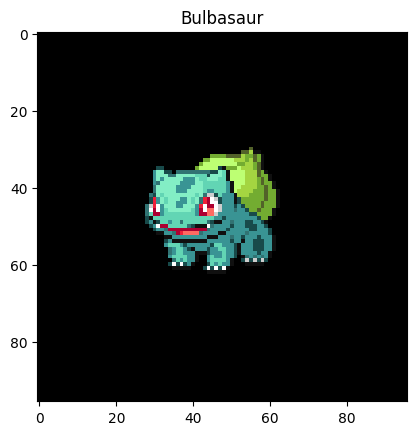

In [4]:
row = produce(iterator)

## Most performant case

Write here different attempts to improve the performance of the data loader, so that the memory usage and the time to produce an image is very low. Consider that:
* You can report many attemps; show the effect of playing with the `threading`, `asyncio` and `multiprocessing` modules.
* You can report your results in any way you consider relevant.
* You can even use a different `load` function, one that you think it is more appropiate to maximize performance. 